### Connect to SQL from Jupyter Notebook

Stephen Anstis



In [49]:
import pandas as pd

import sqlalchemy

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [8]:
from sqlalchemy import create_engine
# Postgres username, password, and database name
POSTGRES_ADDRESS = 'localhost' ## INSERT YOUR DB ADDRESS IF IT'S NOT ON PANOPLY
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'postgres' ## CHANGE THIS TO YOUR PANOPLY/POSTGRES USERNAME
POSTGRES_PASSWORD = 'd3coded' ## CHANGE THIS TO YOUR PANOPLY/POSTGRES PASSWORD 
POSTGRES_DBNAME = 'decodeddatabase' ## CHANGE THIS TO YOUR DATABASE NAME
# A long string that contains the necessary Postgres login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
      .format(username=POSTGRES_USERNAME,
       password=POSTGRES_PASSWORD,
       ipaddress=POSTGRES_ADDRESS,
       port=POSTGRES_PORT,
       dbname=POSTGRES_DBNAME))
# Create the connection
cnx = create_engine(postgres_str)

In [11]:
dfDemographics = pd.read_sql_query('SELECT * FROM loandefaultratesbydemographics',cnx)

In [39]:
dfDemographics

,gender,birthdecade,clientcount,loanamount,loancount,loandefaultcount,loandefaultrate
0,F,1910.0,44,NaN,0,0,NaN
1,M,1910.0,70,NaN,0,0,NaN
2,M,1920.0,237,NaN,0,0,NaN
3,F,1920.0,250,NaN,0,0,NaN
4,F,1930.0,279,2315952.0,19,2,0.105263
5,F,1940.0,511,16678080.0,106,7,0.066038
6,M,1950.0,498,14040744.0,95,5,0.052632
7,F,1970.0,525,14596740.0,91,4,0.043956
8,M,1930.0,374,6339864.0,47,2,0.042553
9,M,1940.0,481,11169192.0,84,3,0.035714


T:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


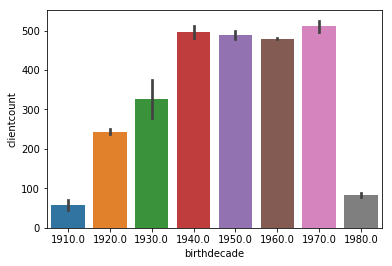

In [56]:
sns.barplot(dfDemographics['birthdecade'],dfDemographics['clientcount'])

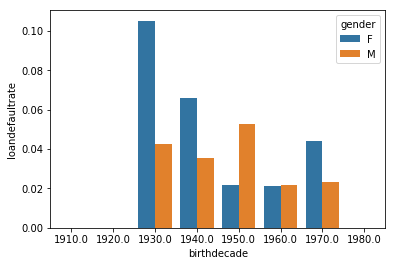

In [30]:
sns.barplot(dfDemographics['birthdecade'],dfDemographics['loandefaultrate'], hue=dfDemographics['gender'])

In [35]:
dfLoanPerfDistrict = pd.read_sql_query('SELECT * FROM loanperformanceperdistrict2',cnx)
dfLoanPerfDistrict


,district_name,loancount,loandefaultcount,loanamount,loandefaultperdistrict,loanarrearsperdistrict
0,Sokolov,2,1,148524.0,0.500000,0.000000
1,Tabor,7,2,964944.0,0.285714,0.000000
2,Karlovy Vary,8,2,845196.0,0.250000,0.000000
3,Tachov,8,2,959784.0,0.250000,0.000000
4,Kutna Hora,9,2,2095980.0,0.222222,0.111111
5,Znojmo,6,1,944376.0,0.166667,0.000000
6,Strakonice,6,1,1224492.0,0.166667,0.333333
7,Trebic,6,1,630000.0,0.166667,0.000000
8,Bruntal,6,1,1277796.0,0.166667,0.333333
9,Cesky Krumlov,7,1,584328.0,0.142857,0.000000


### Arrears compared to Value (each District)


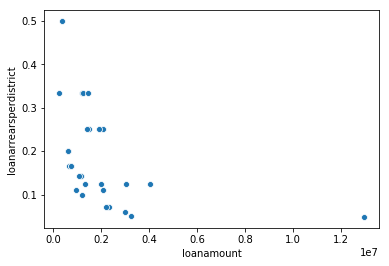

In [45]:
dfLoanPerfDistrictArrears = dfLoanPerfDistrict[dfLoanPerfDistrict['loanarrearsperdistrict']>0]


sns.scatterplot(dfLoanPerfDistrictArrears['loanamount'],dfLoanPerfDistrictArrears['loanarrearsperdistrict'])

### Default compared to Value (each District)

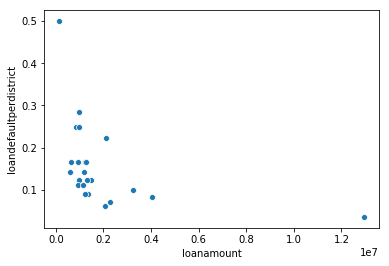

In [54]:
dfLoanPerfDistrictDefault = dfLoanPerfDistrict[dfLoanPerfDistrict['loandefaultperdistrict']>0]


sns.scatterplot(dfLoanPerfDistrictDefault['loanamount'],dfLoanPerfDistrictDefault['loandefaultperdistrict'])

### Kmeans clustering  Arrears compared to Value (each District)

In [51]:
data = []
for index,row in dfLoanPerfDistrictArrears.iterrows():
        arrears = row['loanarrearsperdistrict']
        loanamount = row['loanamount']
        data.append([float(arrears),float(loanamount)])
        
model = KMeans(n_clusters = 4)

model.fit(scale(data))



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
dfLoanPerfDistrictArrears['cluster'] = model.labels_.astype(float)

T:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


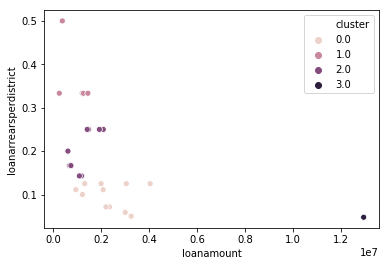

In [55]:
sns.scatterplot(dfLoanPerfDistrictArrears['loanamount'],dfLoanPerfDistrictArrears['loanarrearsperdistrict'], hue=dfLoanPerfDistrictArrears['cluster'])

### Conclusion - deal with cluster 2 Districts as a priority: higher loan value and higher default rate